In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

In [3]:
df.head(5)

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,44,Male,3.1,7,6,2,5,Facebook,10
1,30,Other,5.1,7,8,5,3,LinkedIn,10
2,23,Other,7.4,6,7,1,3,YouTube,6
3,36,Female,5.7,7,8,1,1,TikTok,8
4,34,Female,7.0,4,7,5,1,X (Twitter),8


In [4]:
df["Age Group"] = pd.cut(
    df["Age"],
    bins=[0, 20, 25, 30, 35, 40, 200],
    labels=["15 - 20","21 - 25","26 - 30","31- 35","36 - 40","Other"],
    right=True
)

In [5]:
df = df.rename(columns={
    "Stress_Level(1-10)": "Stress Level",
    "Daily_Screen_Time(hrs)": "Daily Screen Time(hrs)",
    "Exercise_Frequency(week)":"Exercise Frequency(week)",
    "Social_Media_Platform":"Social Media Platform",
    "Happiness_Index(1-10)":"Happiness Index",
    "Days_Without_Social_Media":"Days Without Social Media",
    "Sleep_Quality(1-10)":"Sleep Quality"
})


In [6]:
df["Happiness Category"] = np.select(
    [
        (df["Happiness Index"] >= 1) & (df["Happiness Index"] <= 4),
        (df["Happiness Index"] >= 5) & (df["Happiness Index"] <= 7)
    ],
    ["Not Happy", "Neutral"],
    default="Happy"
)

In [7]:
df["Sleep Quality Category"] = np.select(
    [
        (df["Sleep Quality"] >= 1) & (df["Sleep Quality"] <= 4),
        (df["Sleep Quality"] >= 5) & (df["Sleep Quality"] <= 7)
    ],
    ["Poor Sleep", "Average Sleep"],
    default="Good Sleep"
)

In [8]:
df["Screen Addiction"] = np.select(
    [
        (df["Daily Screen Time(hrs)"] >= 1) & (df["Daily Screen Time(hrs)"] <= 2),
        (df["Daily Screen Time(hrs)"] >= 3) & (df["Daily Screen Time(hrs)"] <= 4),
        (df["Daily Screen Time(hrs)"] >= 5) & (df["Daily Screen Time(hrs)"] <= 6)
    ],
    ["Very Low (1-2)", "Low (3-4)", "Moderate (5-6)"],
    default="High(6+)"
)

In [9]:
df["Stress"] = np.select(
    [
        (df["Stress Level"] >= 1) & (df["Stress Level"] <= 3),
        (df["Stress Level"] >= 4) & (df["Stress Level"] <= 6)
    ],
    ["Mild", "Moderate"],
    default="Severe"
)


In [10]:
df["Excercise Freq"] = np.select(
    [
        df["Exercise Frequency(week)"] == 0,
        (df["Exercise Frequency(week)"] >= 1) & (df["Exercise Frequency(week)"] <= 2),
        (df["Exercise Frequency(week)"] >= 3) & (df["Exercise Frequency(week)"] <= 5)
    ],
    ["No Activity", "Rare (1-2 Days)", "Moderate (3-5 Days)"],
    default="Frequent (5+)"
)

In [11]:
df["Offline Days"] = np.select(
    [
        df["Days Without Social Media"] == 0,
        (df["Days Without Social Media"] >= 1) & (df["Days Without Social Media"] <= 2),
        (df["Days Without Social Media"] >= 3) & (df["Days Without Social Media"] <= 5)
    ],
    ["No Breaks (0 days)", "Short Breaks (1–2 days)", "Moderate Breaks (3–5 days)"],
    default="Offline Regularly (6+ days)"
)

In [12]:
avg_screen_time = df['Daily Screen Time(hrs)'].mean().round(2)
avg_stress_level = df['Stress Level'].mean().round(2)
avg_sleep_quality = df['Sleep Quality'].mean().round(2)
avg_excersise_days = df['Exercise Frequency(week)'].mean().round(2)
avg_happiness_index = df['Happiness Index'].mean().round(2)
avg_days_without_social_media = df['Days Without Social Media'].mean().round(2)

In [13]:
print(f"Average Stress Level = {avg_stress_level}")
print(f"Average Screen Level = {avg_screen_time}")
print(f"Average Sleep Quality = {avg_sleep_quality}")
print(f"Average Exercise Days = {avg_excersise_days}")
print(f"Average Happiness Index = {avg_happiness_index}")
print(f"Average Days without Social Media  = {avg_days_without_social_media}")

Average Stress Level = 6.62
Average Screen Level = 5.53
Average Sleep Quality = 6.3
Average Exercise Days = 2.45
Average Happiness Index = 8.38
Average Days without Social Media  = 3.13


In [14]:
total_users = len(df)
offline_users = len(df[df['Days Without Social Media'] >= 3])

Percentage_Users_Taking_Offline_Days = round((offline_users / total_users) * 100, 2)

In [15]:
print(f"% Users Taking Offline Days = {Percentage_Users_Taking_Offline_Days}")

% Users Taking Offline Days = 61.6


In [16]:
total_users = len(df)
High_stress = len(df[df['Stress Level']>=8])

High_Stress_Percentage = round((High_stress/total_users)*100,2)

In [17]:
print(f"High Stress % = {High_Stress_Percentage}")

High Stress % = 28.6


In [18]:
total_users = len(df)
Low_Happiness = len(df[df['Happiness Index']<=4])

Low_Happiness_Percentage = round((Low_Happiness/total_users)*100,2)

In [19]:
print(f"Low Happiness % = {Low_Happiness_Percentage}")

Low Happiness % = 1.4


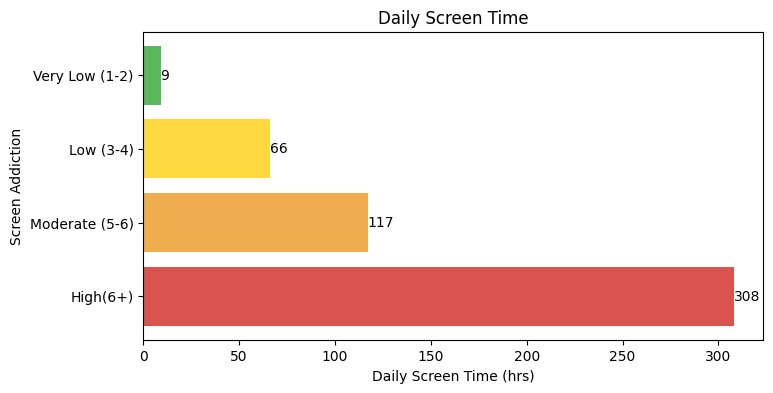

In [20]:
screen_counts = df['Screen Addiction'].value_counts() #Count value of each category

plt.figure(figsize=(8,4))
colors = ["#d9534f", "#f0ad4e", "#ffd940", "#5cb85c"]

plt.barh(screen_counts.index, screen_counts.values, color=colors)

plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Screen Addiction")
plt.title("Daily Screen Time")

for index, value in enumerate(screen_counts.values):
    plt.text(value, index, str(value), va='center')

plt.show()


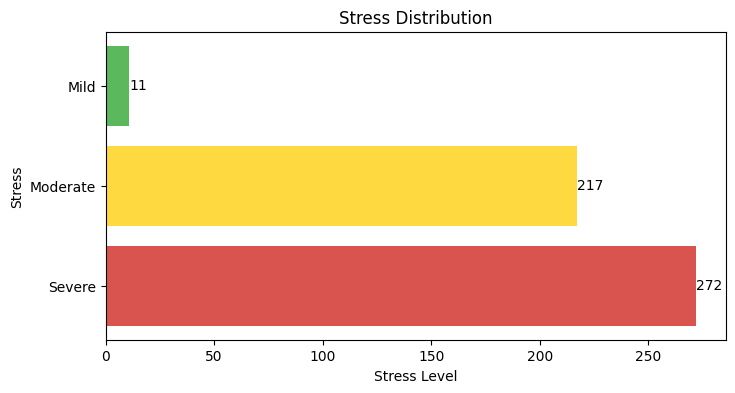

In [21]:
Stress_distribution = df['Stress'].value_counts() #Count value of each category

plt.figure(figsize=(8,4))
colors = ["#d9534f", "#ffd940", "#5cb85c"]

plt.barh(Stress_distribution.index, Stress_distribution.values, color=colors)

plt.xlabel("Stress Level")
plt.ylabel("Stress")
plt.title("Stress Distribution")

for index, value in enumerate(Stress_distribution.values):
    plt.text(value, index, str(value), va='center')

plt.show()


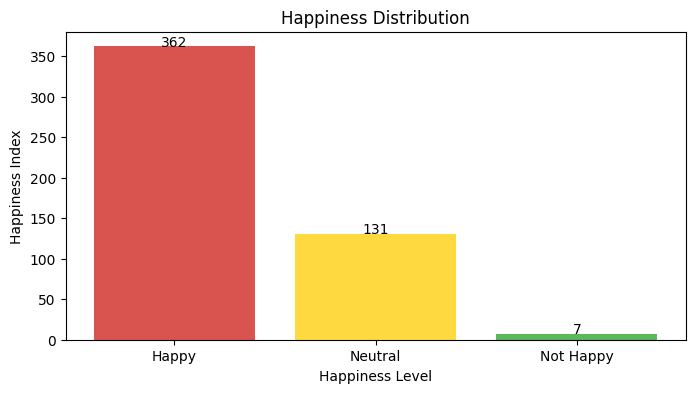

In [21]:
Happiness_distribution = df['Happiness Category'].value_counts()

plt.figure(figsize=(8, 4))
colors = ["#d9534f", "#ffd940", "#5cb85c"]

plt.bar(Happiness_distribution.index,
        Happiness_distribution.values,
        color=colors)

plt.xlabel("Happiness Level")
plt.ylabel("Happiness Index")
plt.title("Happiness Distribution")

# Add values on top of the bars
for idx, value in enumerate(Happiness_distribution.values):
    plt.text(
        idx,                  
        value + 0.5,          
        str(value), 
        ha='center'
    )

plt.show()



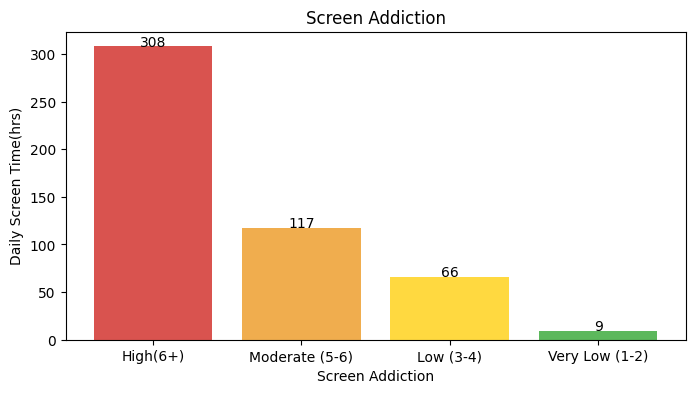

In [22]:
Screen_Addiction = df['Screen Addiction'].value_counts()

plt.figure(figsize=(8, 4))
colors = ["#d9534f", "#f0ad4e", "#ffd940", "#5cb85c"]

plt.bar(Screen_Addiction.index,
        Screen_Addiction.values,
        color=colors)

plt.xlabel("Screen Addiction")
plt.ylabel("Daily Screen Time(hrs)")
plt.title("Screen Addiction")

# Add values on top of the bars
for idx, value in enumerate(Screen_Addiction.values):
    plt.text(
        idx,                  
        value + 0.5,          
        str(value), 
        ha='center'
    )

plt.show()



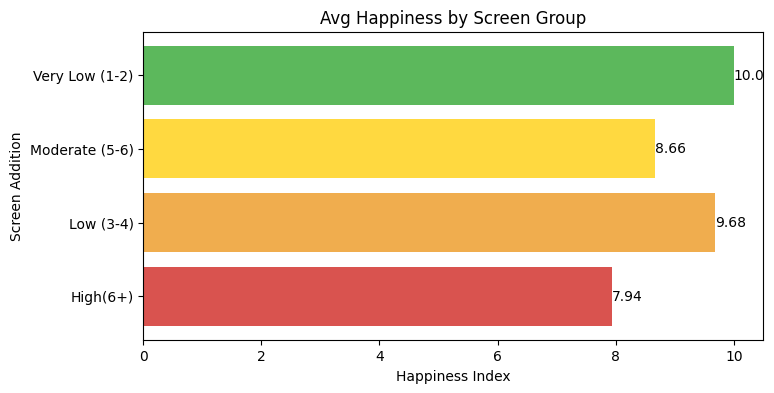

In [24]:
avg_happiness = df.groupby("Screen Addiction")["Happiness Index"].mean().round(2)
plt.figure(figsize=(8,4))
colors = ["#d9534f", "#f0ad4e", "#ffd940", "#5cb85c"]

plt.barh(avg_happiness.index, avg_happiness.values,color = colors)

plt.xlabel("Happiness Index")
plt.ylabel("Screen Addition")
plt.title("Avg Happiness by Screen Group")

# add values on the bars
for index, value in enumerate(avg_happiness.values):
    plt.text(value, index, str(value), va='center')

plt.show()

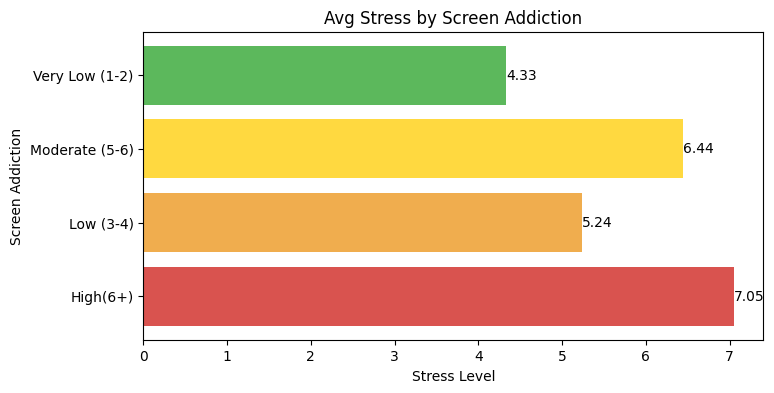

In [25]:
avg_stress = df.groupby("Screen Addiction")["Stress Level"].mean().round(2)
plt.figure(figsize=(8,4))
colors = ["#d9534f", "#f0ad4e", "#ffd940", "#5cb85c"]

plt.barh(avg_stress.index, avg_stress.values,color = colors)

plt.xlabel("Stress Level")
plt.ylabel("Screen Addiction")
plt.title("Avg Stress by Screen Addiction")

# add values on the bars
for index, value in enumerate(avg_stress.values):
    plt.text(value, index, str(value), va='center')

plt.show()

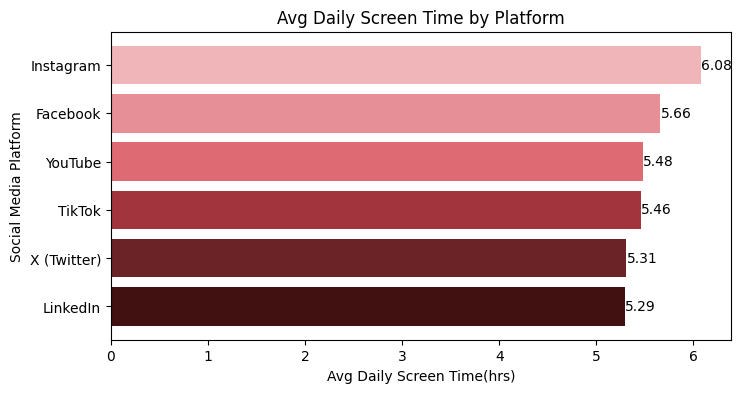

In [26]:
avg_screen_platform = df.groupby("Social Media Platform")["Daily Screen Time(hrs)"].mean().round(2).sort_values(ascending=True)
plt.figure(figsize=(8,4))
colors = ["#411010", "#6B2328", "#A1343C", "#DE6A73","#E68F96","#EFB5B9"]

plt.barh(avg_screen_platform.index, avg_screen_platform.values,color = colors)

plt.xlabel("Avg Daily Screen Time(hrs)")
plt.ylabel("Social Media Platform")
plt.title("Avg Daily Screen Time by Platform")

# add values on the bars
for index, value in enumerate(avg_screen_platform.values):
    plt.text(value, index, str(value), va='center')

plt.show()

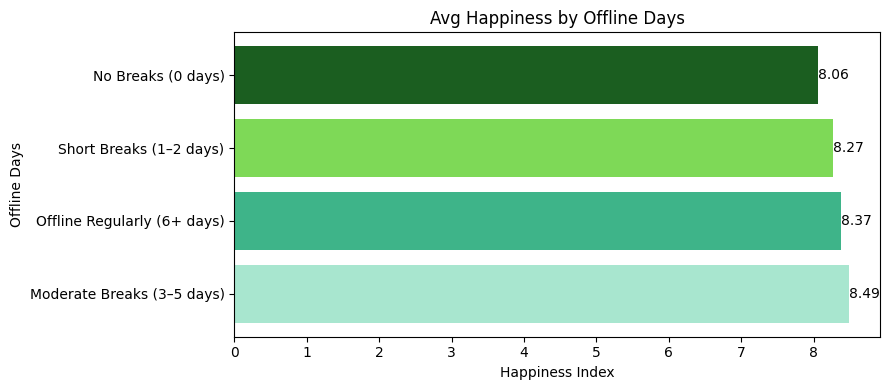

In [27]:
Offline_Happiness = (
    df.groupby("Offline Days")["Happiness Index"]
      .mean()
      .round(2)
      .sort_values(ascending=False)
)

colors = ["#A8E6CF", "#3EB489", "#7ED957", "#1B5E20"]

plt.figure(figsize=(9, 4))

plt.barh(Offline_Happiness.index, Offline_Happiness.values, color=colors)

plt.xlabel("Happiness Index")
plt.ylabel("Offline Days")
plt.title("Avg Happiness by Offline Days")

for idx, value in enumerate(Offline_Happiness.values):
    plt.text(value, idx, str(value), va='center')

plt.tight_layout()
plt.show()


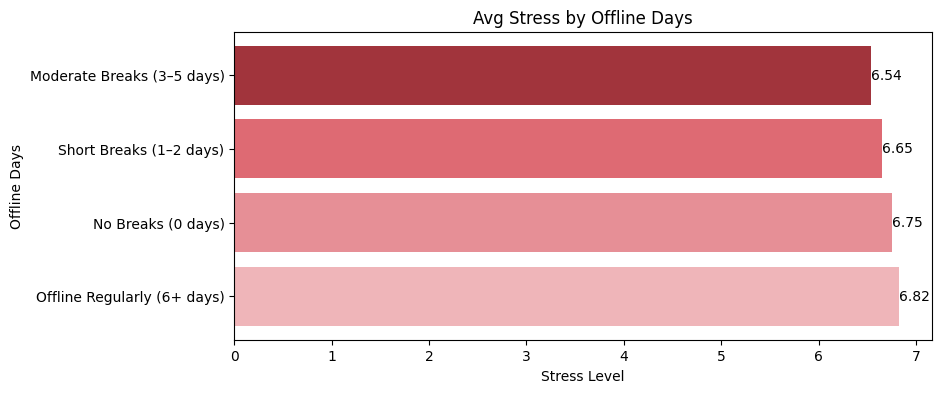

In [28]:
Offline_Stress = df.groupby("Offline Days")["Stress Level"].mean().round(2).sort_values(ascending=False)

colors = ["#EFB5B9", "#E68F96", "#DE6A73", "#A1343C"]

plt.figure(figsize=(9, 4))

plt.barh(Offline_Stress.index, Offline_Stress.values, color=colors)

plt.xlabel("Stress Level")
plt.ylabel("Offline Days")
plt.title("Avg Stress by Offline Days")

for idx, value in enumerate(Offline_Stress.values):
    plt.text(value, idx, str(value), va='center')

plt.show()


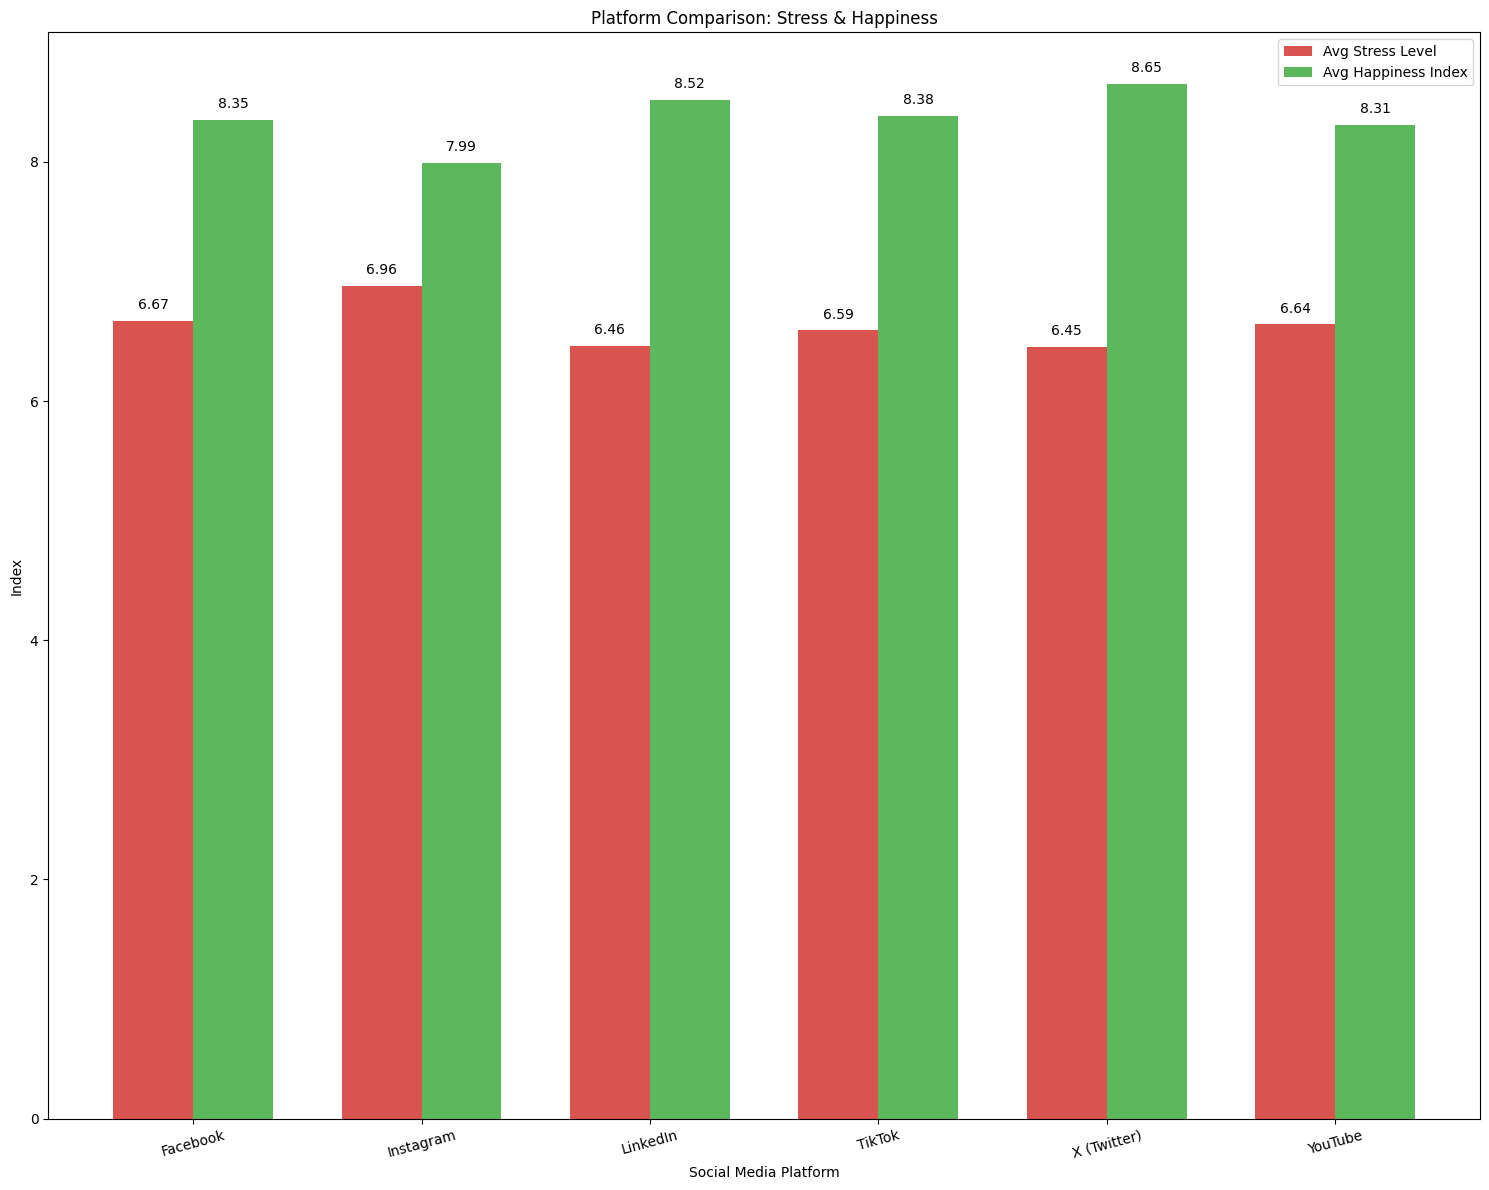

In [29]:
avg_stress = df.groupby("Social Media Platform")["Stress Level"].mean().round(2)

avg_happiness = df.groupby("Social Media Platform")["Happiness Index"].mean().round(2)

platforms = avg_stress.index

x = np.arange(len(platforms))
width = 0.35  # width of each bar

plt.figure(figsize=(15,12))

plt.bar(x - width/2, avg_stress.values, width, label="Avg Stress Level",color="#d9534f")

plt.bar(x + width/2, avg_happiness.values, width, label="Avg Happiness Index",color="#5cb85c")

for i, v in enumerate(avg_stress.values):
    plt.text(i - width/2, v + 0.1, str(v), ha='center')

for i, v in enumerate(avg_happiness.values):
    plt.text(i + width/2, v + 0.1, str(v), ha='center')

plt.xticks(x, platforms, rotation=15)
plt.ylabel("Index")
plt.xlabel("Social Media Platform")
plt.title("Platform Comparison: Stress & Happiness")
plt.legend()

plt.tight_layout()
plt.show()
